# Deep Learning with PyTorch



## Linear Regression Model with a custom dataset

Linear regression is a type of supervised machine-learning algorithm that learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets. It assumes that there is a linear relationship between the input and output, meaning the output changes at a constant rate as the input changes. This relationship is represented by a straight line.{A difinition from https://www.geeksforgeeks.org/machine-learning/ml-linear-regression/}


deep learning workflow:
1. data loading
2. model building
3. model training and evaluation
4. saving the model

In [120]:
import torch
from torch import nn
import matplotlib.pyplot as plt


### 1. Data Loading

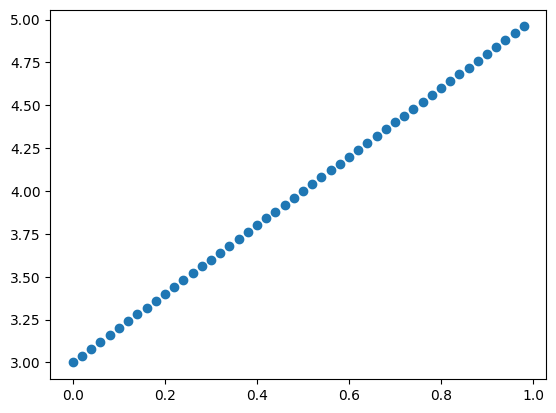

In [121]:
start = 0 
end = 1
step = 0.02
weight = 2
bias = 3
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias
plt.scatter(x, y)
plt.show()

Now, Let's split the data into three sets randomly as train, validation, and test sets. We'll use 20% of the data for testing while 80% will be used for training and validation.

In [122]:
import sklearn
from sklearn.model_selection import train_test_split

x1, x_test, y1, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x1, y1, test_size=0.2, random_state=42)

### Why do we split data into train, validation, and test sets?

Imagine you’re studying for an exam.

Training set (Study Material):
This is like the notes and books you use to learn.
-> The model uses this data to adjust its internal rules (weights).

Validation set (Practice Tests):
This is like mock tests you take while studying.
-> It helps you check: “Am I learning well, or just memorizing the training data?”

We use it to tune hyperparameters (like learning rate, number of epochs).

It prevents overfitting (when the model memorizes instead of learning patterns).

Test set (Final Exam):
This is like your real exam, with questions you’ve never seen before.
-> We only use it once at the end to see how well our model performs in real life.

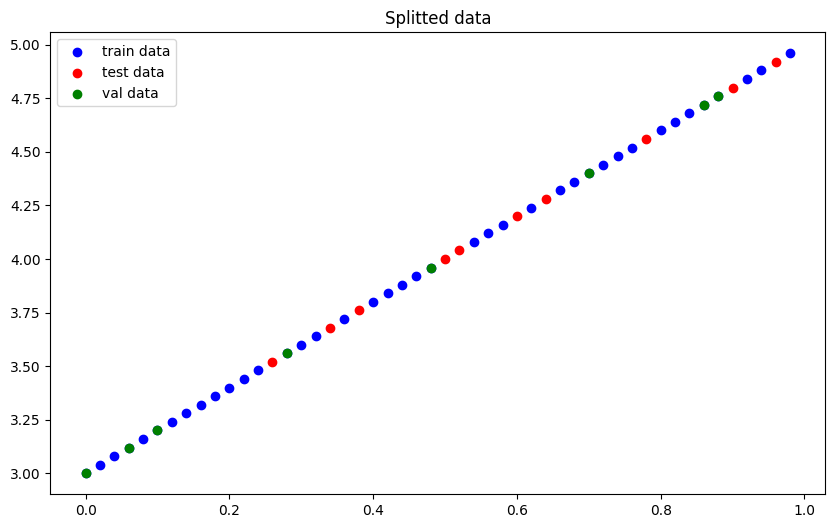

In [123]:
plt.figure(figsize=(10,6))
plt.scatter(x1,y1,c='b',label='train data')
plt.scatter(x_test,y_test,c='r',label='test data')
plt.scatter(x_val,y_val,c='g',label='val data')
plt.title("Splitted data")
plt.legend()
plt.show()

### 2. Model Building

In [124]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.Linear_stack = nn.Sequential(
            nn.Linear(input_size, output_size)
        )
    
    def forward(self, x: torch.tensor)-> torch.Tensor:
        
        return self.Linear_stack(x)

### Define Loss Function and Optimizer

Loss measures how far our predictions are from the real values.

In [125]:
model = LinearRegression(input_size=1, output_size=1)
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### 3. Model training and evaluation

In [135]:
epochs = 1000

for epoch in range(epochs):
    model.train()
# Training
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluation
    model.eval()
    with torch.inference_mode():
        y_pred = model(x_val)
        test_loss = loss_fn(y_pred, y_val)
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")



Epoch: 0 | Loss: 0.0039 | Test Loss: 0.0079
Epoch: 1 | Loss: 0.0083 | Test Loss: 0.0041
Epoch: 2 | Loss: 0.0039 | Test Loss: 0.0079
Epoch: 3 | Loss: 0.0083 | Test Loss: 0.0041
Epoch: 4 | Loss: 0.0039 | Test Loss: 0.0079
Epoch: 5 | Loss: 0.0083 | Test Loss: 0.0041
Epoch: 6 | Loss: 0.0039 | Test Loss: 0.0079
Epoch: 7 | Loss: 0.0083 | Test Loss: 0.0041
Epoch: 8 | Loss: 0.0039 | Test Loss: 0.0079
Epoch: 9 | Loss: 0.0083 | Test Loss: 0.0041
Epoch: 10 | Loss: 0.0039 | Test Loss: 0.0079
Epoch: 11 | Loss: 0.0083 | Test Loss: 0.0041
Epoch: 12 | Loss: 0.0039 | Test Loss: 0.0079
Epoch: 13 | Loss: 0.0083 | Test Loss: 0.0041
Epoch: 14 | Loss: 0.0039 | Test Loss: 0.0079
Epoch: 15 | Loss: 0.0083 | Test Loss: 0.0041
Epoch: 16 | Loss: 0.0039 | Test Loss: 0.0079
Epoch: 17 | Loss: 0.0083 | Test Loss: 0.0041
Epoch: 18 | Loss: 0.0039 | Test Loss: 0.0079
Epoch: 19 | Loss: 0.0083 | Test Loss: 0.0041
Epoch: 20 | Loss: 0.0039 | Test Loss: 0.0079
Epoch: 21 | Loss: 0.0083 | Test Loss: 0.0041
Epoch: 22 | Loss: 0.

In [136]:
y_pred = model(x_val)
y_pred.shape

torch.Size([8, 1])

In [137]:
x_val.shape

torch.Size([8, 1])

In [138]:
y_pred = y_pred.detach().numpy()
y_pred

array([[3.2048013],
       [4.7630205],
       [3.0050297],
       [4.7230663],
       [3.1248927],
       [3.963934 ],
       [3.5643904],
       [4.403432 ]], dtype=float32)

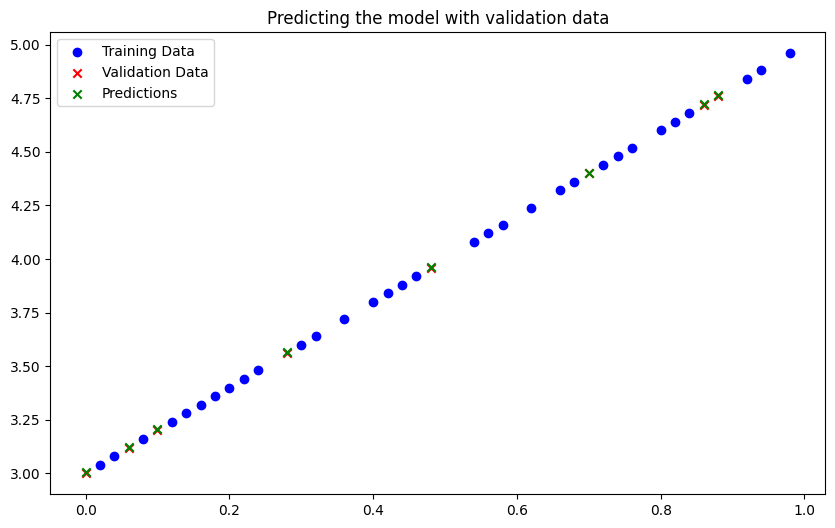

In [139]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, c='b', marker='o', label='Training Data')
plt.scatter(x_val, y_val, c='r', marker='x', label='Validation Data')
plt.scatter(x_val, y_pred, c='g', marker='x', label='Predictions')
plt.title("Predicting the model with validation data")
plt.legend()
plt.show()


The predictions are overlapping with thw validations data. This means the model is working well.

Now, lets work on the testing data

In [140]:
new_pred = model(x_test)
new_pred

tensor([[3.5244],
        [4.5632],
        [4.2037],
        [4.8030],
        [3.6843],
        [4.9228],
        [4.0438],
        [4.0039],
        [4.2836],
        [3.7642]], grad_fn=<AddmmBackward0>)

In [141]:
new_pred = new_pred.detach().numpy()

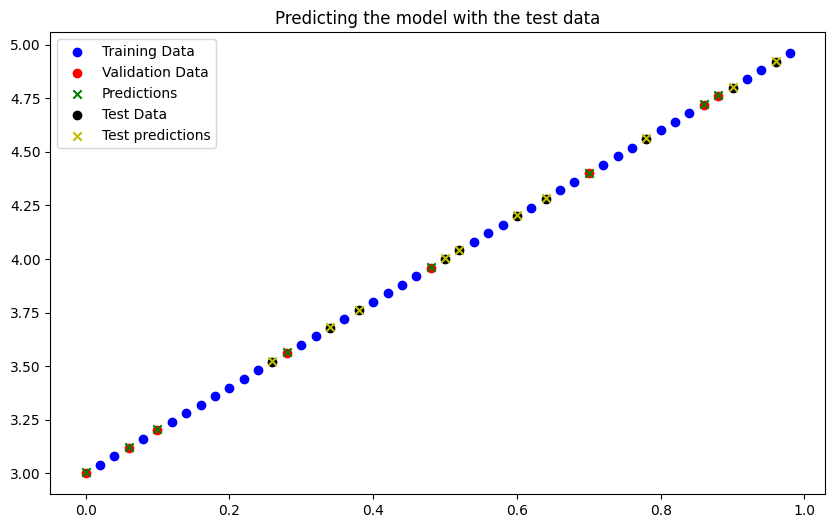

In [142]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, c='b', marker='o', label='Training Data')
plt.scatter(x_val, y_val, c='r', marker='o', label='Validation Data')
plt.scatter(x_val, y_pred, c='g', marker='x', label='Predictions')
plt.scatter(x_test, y_test, c='k', marker='o', label='Test Data')
plt.scatter(x_test, new_pred, c='y', marker='x', label='Test predictions')
plt.title("Predicting the model with the test data")
plt.legend()
plt.show()

Here, in the above graph we find out that the model our predictions data based on the test data fits exactly on the line. This shows our model is working really well.

### 4. Saving the model

In [143]:
save_path = "Linear_regression_model.pth"
torch.save(model.state_dict(), save_path)

print(f"Model saved to {save_path}")

Model saved to Linear_regression_model.pth


## Conclusion

We successfully built a linear regression model with custom dataset using PyTorch! 